In [1]:
import os
import pandas as pd

In [2]:
results = pd.read_json(os.path.join('data','ergast-results.json'))
wikidata_ids = pd.read_csv(os.path.join('data','wikidata_ids.csv'))
wikid = pd.read_json(os.path.join('data','wikidata.json'))
causes_of_death = pd.read_json(os.path.join('data','causes_of_death.json'))

In [3]:
causes_of_death

,wikidata_id,cause_of_death_mistral,cause_of_death_full
0,Q10490,gp,\#gp died in an race car accident during an F1...
1,Q113327,natural,"""#natural""\nMaglioli died in Monza in 1999, an..."
2,Q113496,natural,"""#otherracing died in a race car that was not ..."
3,Q115666,natural,"""#natural""\nHeini Walter died of natural cause..."
4,Q115677,unknown,"""#unknown the cause of death is unknown or can..."
...,...,...,...
504,Q867073,natural,"""#otherracing died in a race car that was not ..."
505,Q927200,natural,"""#natural the cause of death is not mentioned ..."
506,Q941105,natural,"""#natural William Kenneth Richardson died of n..."
507,Q949196,otherf1,\#otherf1 died in a F1 car but not during a Gr...


In [4]:
results = results.merge(wikidata_ids, left_on="driverUrl", right_on="driverUrl", how="outer")

In [5]:
results = results.merge(causes_of_death, left_on="wikidata_id", right_on="wikidata_id", how="outer")

In [6]:
results = results.merge(wikid, left_on="wikidata_id", right_on="wikidata_id", how="outer")

In [7]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'wikidata_id', 'cause_of_death_mistral', 'cause_of_death_full',
       'full_name', 'bio', 'gender', 'date_of_birth', 'place_of_birth',
       'date_of_death', 'place_of_death', 'cause_of_death', 'manner_of_death'],
      dtype='object')

In [8]:
results['date_of_birth'] = pd.to_datetime(results['date_of_birth'])
results['date_of_death'] = pd.to_datetime(results['date_of_death'])

In [9]:
results['life_remaining'] = results['date_of_death'] - results['date']

In [10]:
results['date'] = pd.to_datetime(results['date'])

In [11]:
results = results.drop_duplicates()

In [12]:
results['year'].nunique()

75

In [13]:
import datetime

In [14]:
today = datetime.date.today()
today

datetime.date(2024, 4, 28)

In [15]:
def total_age(dod, dob):
    if dob:
        if str(dod) != "NaT":
            return dod - dob
        else:
            return pd.to_datetime(today) - dob
    else:
        return None

In [16]:
results['lived_until'] = results.apply(lambda row: total_age(row['date_of_death'], row['date_of_birth']), axis = 1)

In [17]:
results['year'].min() + (results['year'].nunique() / 2)

1987.5

In [18]:
atleast10gps = pd.DataFrame(results.groupby('full_name')['raceId'].nunique()).reset_index()
atleast10gps = atleast10gps[atleast10gps['raceId'] > 10]['full_name'].to_list()

In [19]:
results_wo_indy = results[results['location'] != 'Indianapolis']

In [20]:
from src.graf import graf

In [21]:
help(graf)

Help on function graf in module src.graf:

graf(carovy=[], sloupcovy=[], vodorovny=[], procenta=[], skryte=[], barvy=[], histogram=False, max_procenta=100, target='', titulek='', podtitulek='', osay=' ', osay2=' ', osaymin=None, osaymax=None, kredity='', zaokrouhleni=1, prvni=True, skladany=False, naopak=False, vzhurunohama=False, skrytnuly=False)



In [22]:
import inspect

In [23]:
inspect.getsourcelines(graf) 

(['def graf(\n',
  '    carovy=[],\n',
  '    sloupcovy=[],\n',
  '    vodorovny=[],\n',
  '    procenta=[],\n',
  '    skryte=[],\n',
  '    barvy=[],\n',
  '    histogram=False,\n',
  '    max_procenta=100,\n',
  '    target="",\n',
  '    titulek="",\n',
  '    podtitulek="",\n',
  '    osay=" ",\n',
  '    osay2=" ",\n',
  '    osaymin=None,\n',
  '    osaymax=None,\n',
  '    kredity="",\n',
  '    zaokrouhleni=1,\n',
  '    prvni=True,\n',
  '    skladany=False,\n',
  '    naopak=False,\n',
  '    vzhurunohama=False,\n',
  '\tskrytnuly=False\n',
  '):\n',
  '    import os\n',
  '    import pandas as pd\n',
  '    from highcharts_core.chart import Chart\n',
  '    from highcharts_core.options.series.area import LineSeries\n',
  '    from highcharts_core.options.series.bar import ColumnSeries\n',
  '    from highcharts_core.options.series.bar import BarSeries\n',
  '    from highcharts_core.options.series.histogram import HistogramSeries\n',
  '    from highcharts_core.options.lege

## Judge those who are living and those who are dead

In [24]:
living = results[results['date_of_death'].apply(lambda x: "-" not in str(x))]['full_name'].drop_duplicates().to_list()
len(living)

350

In [25]:
results[results['full_name'].isin(living)].sort_values(by='date_of_birth')[['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().head(20)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
10895,Paul Goldsmith,1925-10-02,NaT,None,None
8973,Hermano da Silva Ramos,1925-12-07,NaT,None,None
18213,John Rhodes,1927-08-18,NaT,None,None
21661,Hans Herrmann,1928-02-23,NaT,None,None
12710,André Milhoux,1928-12-09,NaT,None,None
11291,Bernie Ecclestone,1930-10-28,NaT,None,None
10532,David Piper,1930-12-02,NaT,None,None
12691,Fred Gamble,1932-03-17,NaT,None,None
10353,Alex Soler-Roig,1932-10-29,NaT,None,None
12721,Gaetano Starrabba,1932-12-03,NaT,None,None


In [26]:
dead = results[results['date_of_death'].notnull()]['full_name'].drop_duplicates().to_list()
len(dead)

509

In [27]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death','cause_of_death_mistral']].drop_duplicates().sort_values(by='date_of_death',ascending=False).head(60)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death,cause_of_death_mistral
17555,Wilson Fittipaldi Júnior,1943-12-25,2024-02-23,cardiac arrest,natural causes,natural
20740,Alberto Colombo,1946-02-23,2024-01-07,None,None,natural
12718,Basil van Rooyen,1939-04-19,2023-09-14,None,None,natural
10423,Kenneth McAlpine,1920-09-21,2023-04-08,None,None,natural
10453,Slim Borgudd,1946-11-25,2023-02-23,None,None,natural
5807,Jean-Pierre Jabouille,1942-10-01,2023-02-02,None,None,natural
15147,Philippe Streiff,1955-06-26,2022-12-23,None,None,natural
14857,Patrick Tambay,1949-06-25,2022-12-04,Parkinson's disease,natural causes,natural
6276,Tony Brooks,1932-02-25,2022-05-03,None,None,natural
10430,Reine Wisell,1941-09-30,2022-03-20,None,None,natural


In [28]:
results[(results['full_name'].isin(dead)) & (~results['cause_of_death_mistral'].isin(['natural','unknown']))][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death','cause_of_death_mistral']].drop_duplicates().sort_values(by='date_of_death',ascending=False).head(20)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death,cause_of_death_mistral
7867,Justin Wilson,1978-07-31,2015-08-24,None,None,otherracing
19404,Jules Bianchi,1989-08-03,2015-07-17,diffuse axonal injury,accidental death,gp
15943,Andrea de Cesaris,1959-05-31,2014-10-05,motorcycle accident,accidental death,traffic
10745,Ricardo Londoño,1949-08-08,2009-07-18,None,homicide,violent
9750,Jackie Pretorius,1934-11-22,2009-03-30,None,homicide,violent
17352,Clay Regazzoni,1939-09-05,2006-12-15,traffic collision,None,traffic
19377,Ernie de Vos,1941-07-01,2005-03-05,None,None,othersport
14203,Michele Alboreto,1956-12-23,2001-04-25,traffic collision,None,otherracing
10779,Vic Wilson,1931-04-14,2001-01-14,traffic collision,None,traffic
10859,John Cannon,1933-06-21,1999-10-18,None,None,aviation


In [29]:
results[results['cause_of_death_mistral'] == 'gp'][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death','cause_of_death_mistral']].drop_duplicates().sort_values(by='date_of_death',ascending=False).head(20)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death,cause_of_death_mistral
19404,Jules Bianchi,1989-08-03,2015-07-17,diffuse axonal injury,accidental death,gp
2,Ayrton Senna,1960-03-21,1994-05-01,traumatic brain injury,accidental death,gp
23060,Roland Ratzenberger,1960-07-04,1994-04-30,basilar skull fracture,accidental death,gp
16974,Riccardo Paletti,1958-06-15,1982-06-13,None,None,gp
13384,Gilles Villeneuve,1950-01-18,1982-05-08,traffic collision,None,gp
17206,Ronnie Peterson,1944-02-14,1978-09-11,embolism,None,gp
12984,Tom Pryce,1949-06-11,1977-03-05,traffic collision,None,gp
8699,Mark Donohue,1937-03-18,1975-08-19,None,None,gp
23342,Helmuth Koinigg,1948-11-03,1974-10-06,decapitation,None,gp
7194,Peter Revson,1939-02-27,1974-03-22,None,None,gp


In [30]:
results[results['cause_of_death_mistral'] == 'gp'].groupby("date_of_death")['full_name'].nunique().nlargest()

date_of_death
1960-06-19    2
1953-05-30    1
1954-07-31    1
1955-05-16    1
1955-05-30    1
Name: full_name, dtype: int64

In [31]:
len(results[(results['cause_of_death_mistral'].isin(['gp','otherf1'])) & (results['year'] < 1987)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death','cause_of_death_mistral']].drop_duplicates().sort_values(by='date_of_death',ascending=False))

42

In [102]:
results[results['full_name'].isin(living)].groupby('full_name')[['year','round','gp']].first().sort_values(by=['year','round']).head(10)

,year,round,gp
full_name,,,
Hermano da Silva Ramos,1956.0,5.0,French Grand Prix
André Milhoux,1956.0,7.0,German Grand Prix
Bernie Ecclestone,1958.0,2.0,Monaco Grand Prix
Bruce Kessler,1958.0,2.0,Monaco Grand Prix
Peter Ashdown,1959.0,5.0,British Grand Prix
Hans Herrmann,1959.0,6.0,German Grand Prix
A. J. Foyt,1960.0,3.0,Indianapolis 500
Paul Goldsmith,1960.0,3.0,Indianapolis 500
David Piper,1960.0,6.0,French Grand Prix


In [32]:
pd.Series(results[results['full_name'].isin(living)].groupby(['gp','year'])['full_name'].nunique() / results[results['full_name'].isin(dead)].groupby(['gp','year'])['full_name'].nunique()).sort_values().head(20)

gp                   year  
German Grand Prix    1953.0    0.030303
British Grand Prix   1961.0    0.033333
German Grand Prix    1962.0    0.033333
                     1963.0    0.035714
British Grand Prix   1956.0    0.037037
Belgian Grand Prix   1962.0    0.040000
British Grand Prix   1963.0    0.040000
Italian Grand Prix   1956.0    0.040000
British Grand Prix   1955.0    0.040000
Belgian Grand Prix   1961.0    0.040000
German Grand Prix    1958.0    0.040000
Mexican Grand Prix   1963.0    0.041667
Moroccan Grand Prix  1958.0    0.041667
Monaco Grand Prix    1963.0    0.041667
British Grand Prix   1964.0    0.041667
                     1962.0    0.041667
                     1960.0    0.041667
French Grand Prix    1963.0    0.043478
Monaco Grand Prix    1962.0    0.043478
Belgian Grand Prix   1963.0    0.043478
Name: full_name, dtype: float64

In [33]:
results[results['full_name'].isin(living)].groupby('full_name')['date'].min().sort_values().head(20)

full_name
Hans Herrmann            1953-08-02
Hermano da Silva Ramos   1955-06-19
André Milhoux            1956-08-05
Bruce Kessler            1958-05-18
Bernie Ecclestone        1958-05-18
A. J. Foyt               1958-05-30
Paul Goldsmith           1958-05-30
Peter Ashdown            1959-07-18
David Piper              1959-07-18
Fred Gamble              1960-09-04
Jim Hall                 1960-11-20
Michael May              1961-05-14
Jackie Lewis             1961-06-18
Gaetano Starrabba        1961-09-10
Roger Penske             1961-10-08
Paddy Driver             1963-12-28
Brausch Niemann          1963-12-28
Richard Attwood          1964-07-11
Jackie Stewart           1965-01-01
Clive Puzey              1965-01-01
Name: date, dtype: datetime64[ns]

In [34]:
results[results['full_name'].isin(living) & (results['year'] == 1961.0)]['full_name'].drop_duplicates()

10020         Roger Penske
10503             Jim Hall
10671         Jackie Lewis
12721    Gaetano Starrabba
18208          Michael May
21656        Hans Herrmann
Name: full_name, dtype: object

## Basic stats

In [35]:
results.groupby('cause_of_death_mistral')['full_name'].nunique().nlargest(10) / results.groupby('cause_of_death_mistral')['full_name'].nunique().sum()

cause_of_death_mistral
natural        0.618861
otherracing    0.157171
gp             0.064833
unknown        0.064833
aviation       0.029470
traffic        0.023576
otherf1        0.021611
violent        0.007859
othersport     0.005894
suicide        0.005894
Name: full_name, dtype: float64

In [36]:
results[results['date'] < '1960-01-01'].groupby('cause_of_death_mistral')['full_name'].nunique().nlargest(10) / results[results['date'] < '1960-01-01'].groupby('cause_of_death_mistral')['full_name'].nunique().sum()

cause_of_death_mistral
natural        0.628483
otherracing    0.170279
unknown        0.089783
gp             0.043344
traffic        0.021672
otherf1        0.018576
aviation       0.015480
violent        0.006192
othersport     0.003096
suicide        0.003096
Name: full_name, dtype: float64

In [37]:
0.043344 + 0.018576

0.06192

In [38]:
0.015480 + 0.021672

0.037152000000000004

In [39]:
cardeaths = ['otherracing','gp','otherf1','traffic']

C:\Users\micha\AppData\Local\Temp\ipykernel_14888\725919648.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  results[results['cause_of_death_mistral'].isin(cardeaths)].groupby(pd.Grouper(key='date_of_death', freq='Y'))['full_name'].nunique().plot.bar()


<Axes: xlabel='date_of_death'>

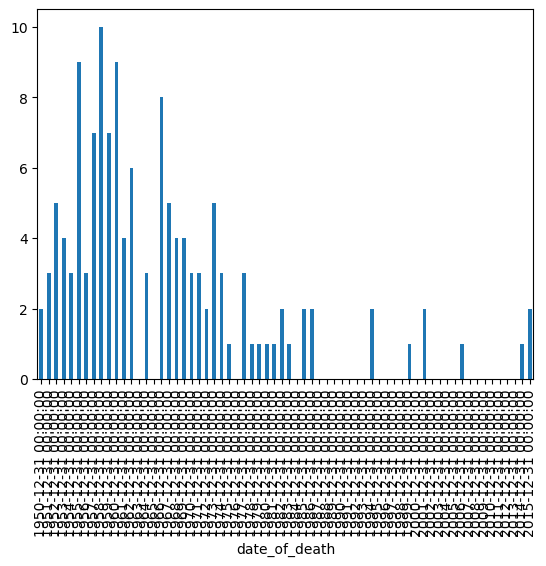

In [40]:
results[results['cause_of_death_mistral'].isin(cardeaths)].groupby(pd.Grouper(key='date_of_death', freq='Y'))['full_name'].nunique().plot.bar()

In [41]:
results[results['cause_of_death_mistral'].isin(cardeaths)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death','cause_of_death_mistral']].drop_duplicates().sort_values(by='date_of_death',ascending=False).head(50)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death,cause_of_death_mistral
7867,Justin Wilson,1978-07-31,2015-08-24,None,None,otherracing
19404,Jules Bianchi,1989-08-03,2015-07-17,diffuse axonal injury,accidental death,gp
15943,Andrea de Cesaris,1959-05-31,2014-10-05,motorcycle accident,accidental death,traffic
17352,Clay Regazzoni,1939-09-05,2006-12-15,traffic collision,None,traffic
14203,Michele Alboreto,1956-12-23,2001-04-25,traffic collision,None,otherracing
10779,Vic Wilson,1931-04-14,2001-01-14,traffic collision,None,traffic
10551,Guy Tunmer,1948-12-01,1999-06-22,None,None,traffic
2,Ayrton Senna,1960-03-21,1994-05-01,traumatic brain injury,accidental death,gp
23060,Roland Ratzenberger,1960-07-04,1994-04-30,basilar skull fracture,accidental death,gp
23384,Jo Gartner,1954-01-24,1986-06-01,None,None,otherracing


In [42]:
results[results['date_of_death'].isnull()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,bio,gender,date_of_birth,place_of_birth,date_of_death,place_of_death,cause_of_death,manner_of_death,life_remaining,lived_until
0,24942.0,1046.0,850.0,210.0,51.0,20.0,17.0,17,17.0,0.0,...,American-Brazilian racing driver (born 1996),male,1996-06-25,Miami,NaT,None,None,None,NaT,10169 days
1,24964.0,1047.0,850.0,210.0,51.0,17.0,19.0,19,19.0,0.0,...,American-Brazilian racing driver (born 1996),male,1996-06-25,Miami,NaT,None,None,None,NaT,10169 days
164,7875.0,356.0,117.0,1.0,2.0,5.0,2.0,2,2.0,6.0,...,French racing driver,male,1955-02-24,Lorette,NaT,None,None,None,NaT,25266 days
165,7913.0,357.0,117.0,1.0,2.0,2.0,2.0,2,2.0,6.0,...,French racing driver,male,1955-02-24,Lorette,NaT,None,None,None,NaT,25266 days
166,7952.0,358.0,117.0,1.0,2.0,2.0,2.0,2,2.0,6.0,...,French racing driver,male,1955-02-24,Lorette,NaT,None,None,None,NaT,25266 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,NaN,1140.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaT
26397,NaN,1141.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaT
26398,NaN,1142.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaT
26399,NaN,1143.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaT


In [43]:
results.groupby("full_name")['lived_until'].max().nlargest(20)

full_name
Kenneth McAlpine         37454 days
Paul Pietsch             36871 days
Leslie Marr              36058 days
Paul Goldsmith           36003 days
Hermano da Silva Ramos   35937 days
Robert La Caze           35919 days
Robert Manzon            35711 days
André Guelfi             35483 days
John Rhodes              35318 days
Hans Herrmann            35129 days
Ken Kavanagh             35048 days
Eric Thompson            34990 days
André Milhoux            34839 days
John Fitch               34787 days
George Connor            34558 days
Tony Crook               34308 days
Chuck Weyant             34265 days
Bernie Ecclestone        34151 days
Tony Gaze                34145 days
David Piper              34116 days
Name: lived_until, dtype: timedelta64[ns]

In [44]:
results.loc[results['date_of_death'].isnull(), 'cause_of_death_mistral'] = 'living'

In [45]:
results.groupby("cause_of_death_mistral")['full_name'].nunique().nlargest(50)

cause_of_death_mistral
living         349
natural        315
otherracing     80
gp              33
unknown         33
aviation        15
traffic         12
otherf1         11
violent          4
othersport       3
suicide          3
Name: full_name, dtype: int64

In [46]:
ceske_popisky = {
    'living': 'Stále naživu',
    'natural': 'Stáří a běžné nemoci',
    'otherracing': 'Nehoda v závodě jiné série než F1',
    'gp': 'Nehoda ve velké ceně F1',
    'unknown': 'Neznámé příčiny',
    'aviation': 'Letecká nehoda',
    'traffic': 'Dopravní nehoda',
    'otherf1': 'Nehoda v F1 mimo velké ceny',
    'violent': 'Násilná smrt',
    'othersport': 'Jiný sport',
    'suicide': 'Sebevražda'
}

In [47]:
ceske_popisky = {
    'Stále naživu': ['living'],
    'Přirozené příčiny': ['natural'],
    'Nehoda v jiném závodu než F1': ['otherracing'],
    'Nehoda v F1': ['gp', 'otherf1'],
    'Neznámé příčiny': ['unknown'],
    'Dopravní a letecké nehody': ['aviation','traffic'],
    'Jiné sporty': ['othersport'],
    'Sebevraždy a vraždy': ['suicide','violent']
}

In [48]:
graf_pricin = []
for cesky, anglicky in ceske_popisky.items():
    graf_pricin.append(
        pd.Series(
        results[results['cause_of_death_mistral'].isin(anglicky)].groupby('year')['full_name'].nunique()
            /
        results.groupby('year')['full_name'].nunique()
            , name=cesky
    )
                      )

In [49]:
graf_pricin = []
for cesky, anglicky in ceske_popisky.items():
    s = pd.Series(
        results[results['cause_of_death_mistral'].isin(anglicky) & (results['year'] <= 2018)].groupby('year')['full_name'].nunique()
            /
        results[(results['year'] <= 2018)].groupby('year')['full_name'].nunique()
            , name=cesky
    )
    s.index = s.index.astype(int)  # Convert index to integer
    graf_pricin.append(s)

In [50]:
graf_pricin

[year
 1950         NaN
 1951         NaN
 1952         NaN
 1953    0.009259
 1954    0.010309
           ...   
 2014    0.958333
 2015    1.000000
 2016    1.000000
 2017    1.000000
 2018    1.000000
 Name: Stále naživu, Length: 69, dtype: float64,
 year
 1950    0.567901
 1951    0.607143
 1952    0.628571
 1953    0.592593
 1954    0.525773
           ...   
 2014         NaN
 2015         NaN
 2016         NaN
 2017         NaN
 2018         NaN
 Name: Přirozené příčiny, Length: 69, dtype: float64,
 year
 1950    0.197531
 1951    0.202381
 1952    0.171429
 1953    0.175926
 1954    0.226804
           ...   
 2014         NaN
 2015         NaN
 2016         NaN
 2017         NaN
 2018         NaN
 Name: Nehoda v jiném závodu než F1, Length: 69, dtype: float64,
 year
 1950    0.037037
 1951    0.083333
 1952    0.057143
 1953    0.074074
 1954    0.082474
           ...   
 2014    0.041667
 2015         NaN
 2016         NaN
 2017         NaN
 2018         NaN
 Name: Nehoda v 

In [51]:
graf(sloupcovy=graf_pricin, procenta=graf_pricin, target='priciny', titulek='Jak umírali účastníci jednotlivých sezon F1', podtitulek='Závody jiných sérií byly pro účastníky mistrovství světa F1 víc než dvakrát smrtelnější než samotné závody F1. Při Velkých cenách jich zahynulo 33 – jen o pět méně jich přišlo o život v obyčejných dopravních a leteckých nehodách.', skladany=True, kredity=["Zdroj dat: Ergast Developer API, Wikipedie | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"])

Graf uložen.


## The grimmest dates, GPs, podiums and seasons

<Axes: xlabel='date_of_death'>

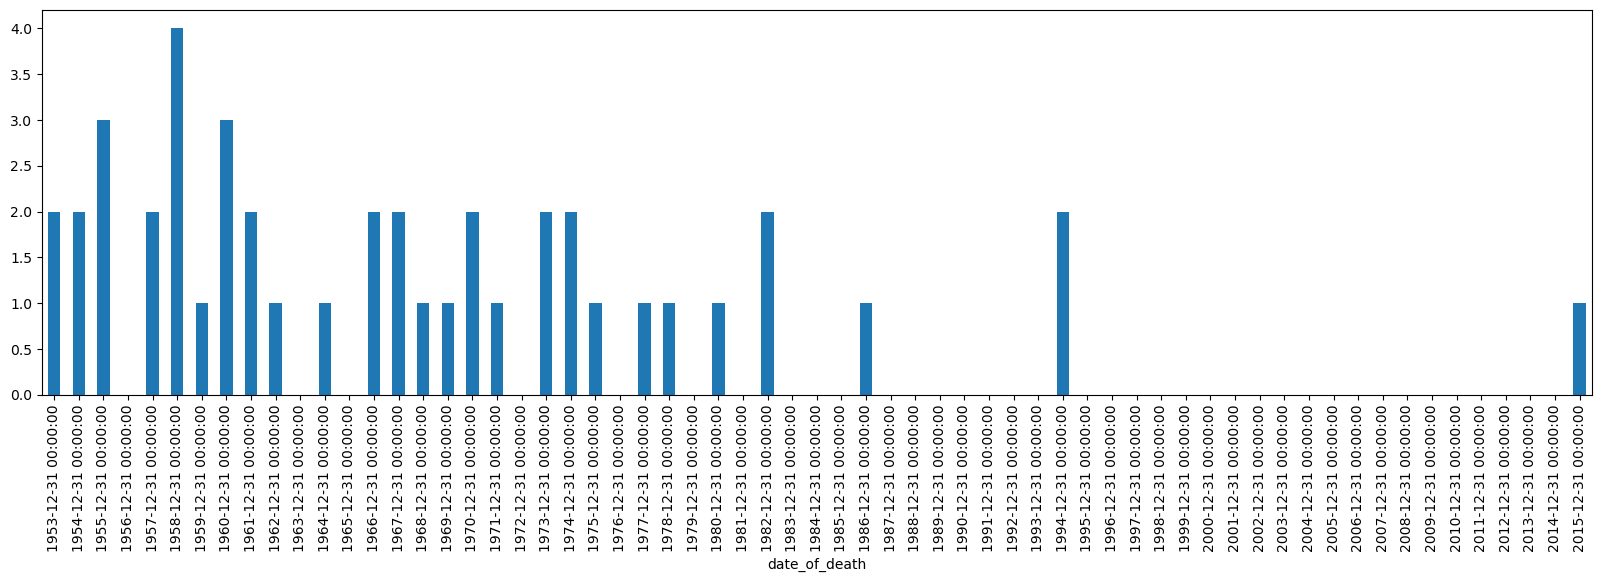

In [52]:
results[results['cause_of_death_mistral'].isin(['gp','otherf1'])].groupby(pd.Grouper(key='date_of_death', freq='YE'))['full_name'].nunique().plot.bar(figsize=(20,5))

<Axes: xlabel='date_of_death'>

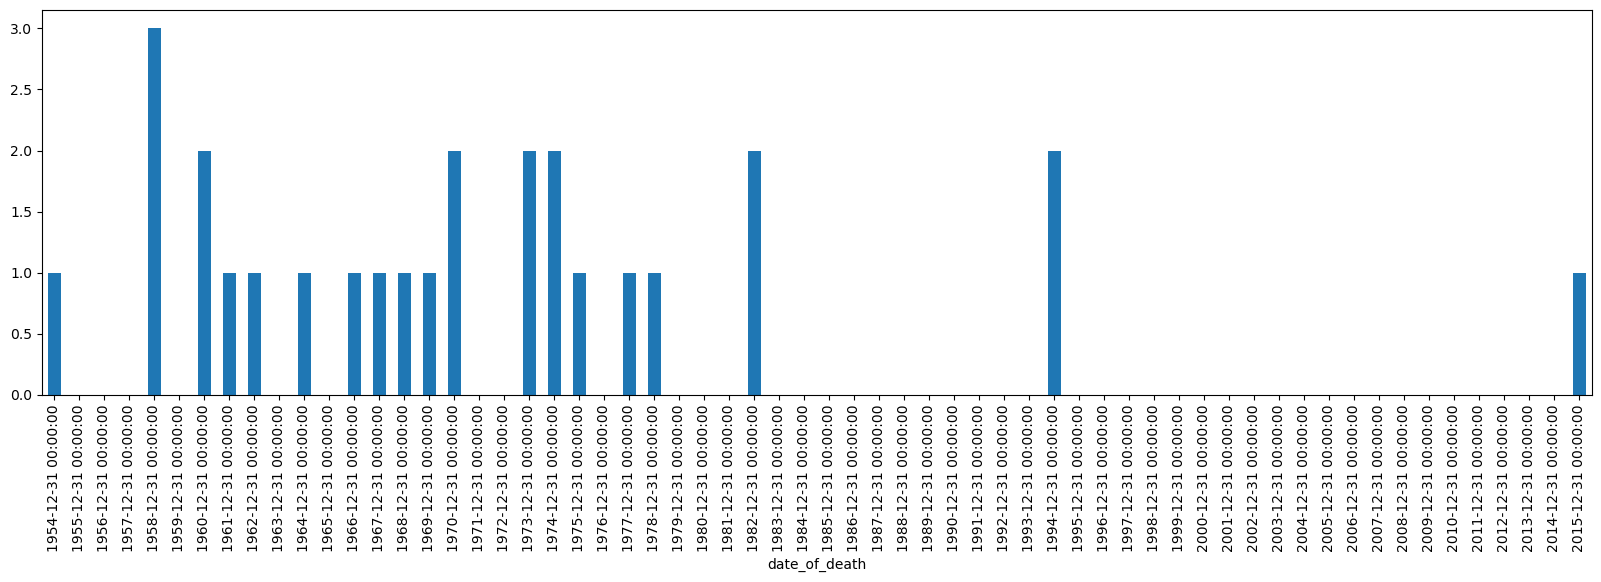

In [53]:
results_wo_indy[results_wo_indy['cause_of_death_mistral'] == 'gp'].groupby(pd.Grouper(key='date_of_death', freq='YE'))['full_name'].nunique().plot.bar(figsize=(20,5))

<Axes: xlabel='date_of_death'>

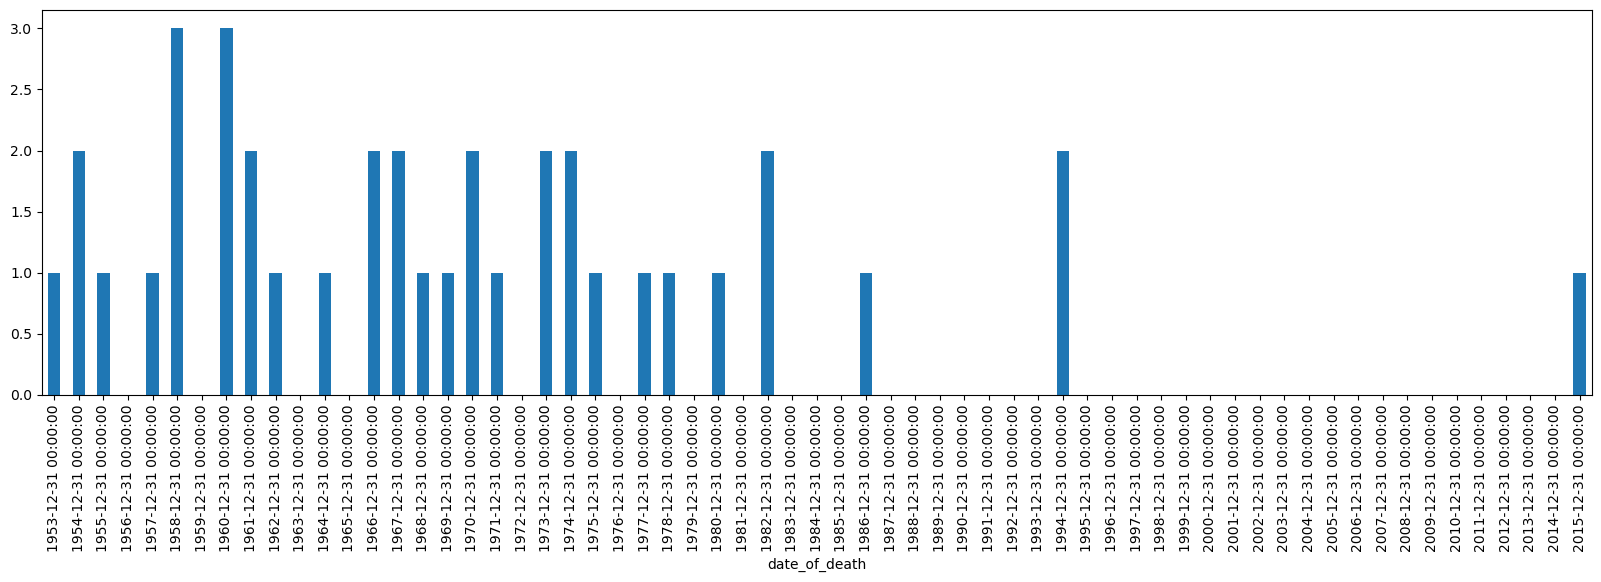

In [54]:
results_wo_indy[results_wo_indy['cause_of_death_mistral'].isin(['gp','otherf1'])].groupby(pd.Grouper(key='date_of_death', freq='YE'))['full_name'].nunique().plot.bar(figsize=(20,5))

<Axes: xlabel='date_of_death'>

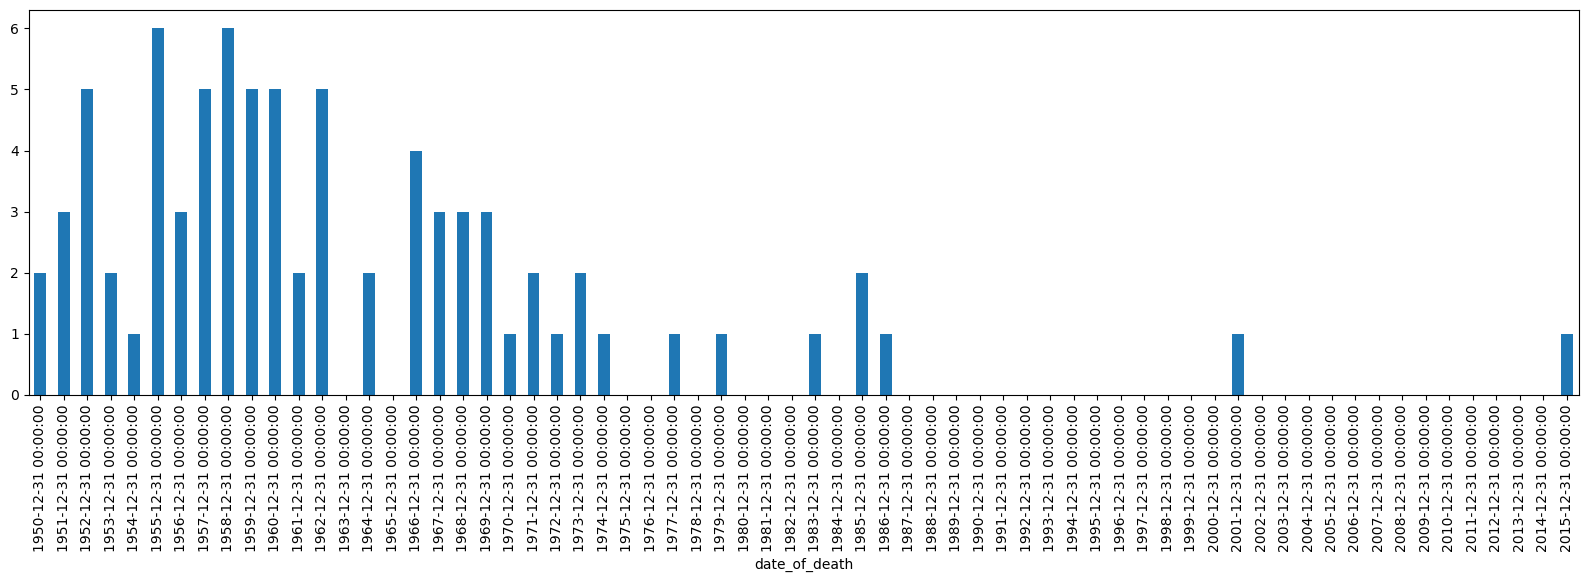

In [55]:
results[results['cause_of_death_mistral'].isin(['otherracing'])].groupby(pd.Grouper(key='date_of_death', freq='YE'))['full_name'].nunique().plot.bar(figsize=(20,5))

In [56]:
results.groupby('date_of_death')['full_name'].nunique().nlargest(10)

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
1975-11-29    2
1987-02-10    2
2014-05-04    2
1950-07-29    1
1950-09-10    1
Name: full_name, dtype: int64

In [57]:
results.groupby(pd.Grouper(key='date', freq='10Y'))['life_remaining'].mean()

C:\Users\micha\AppData\Local\Temp\ipykernel_14888\2686505995.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  results.groupby(pd.Grouper(key='date', freq='10Y'))['life_remaining'].mean()


date
1950-12-31              9937 days 12:18:00
1960-12-31   10852 days 05:25:26.144756224
1970-12-31    9401 days 04:08:35.368420992
1980-12-31    8062 days 15:45:11.894273152
1990-12-31    7241 days 08:48:06.343612288
2000-12-31    3948 days 12:37:01.714285696
2010-12-31              4446 days 00:00:00
2020-12-31     573 days 20:28:14.117647056
2030-12-31                             NaT
Name: life_remaining, dtype: timedelta64[ns]

In [58]:
max_remaining = pd.DataFrame(results.groupby(['year','full_name'])['life_remaining'].max()).reset_index()
max_remaining

,year,full_name,life_remaining
0,1950.0,Alberto Ascari,1831 days
1,1950.0,Alfredo Pián,14675 days
2,1950.0,Bayliss Levrett,18915 days
3,1950.0,Bill Holland,12408 days
4,1950.0,Bill Schindler,844 days
...,...,...,...
3203,2024.0,Pierre Gasly,NaT
3204,2024.0,Sergio Pérez,NaT
3205,2024.0,Valtteri Bottas,NaT
3206,2024.0,Yuki Tsunoda,NaT


<Axes: xlabel='year'>

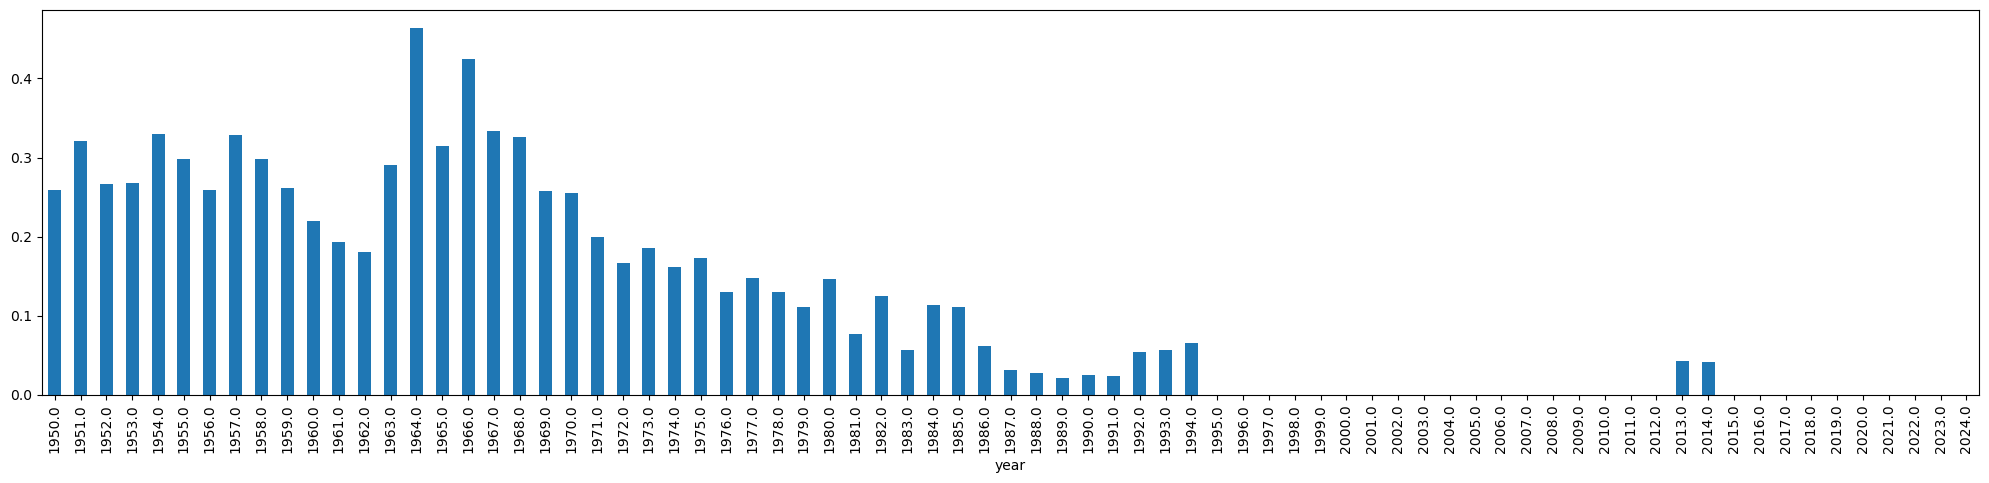

In [59]:
pd.Series(max_remaining[max_remaining['life_remaining'] < pd.Timedelta((365.25*10), unit='d')].groupby('year')['full_name'].nunique() / max_remaining.groupby('year')['full_name'].nunique()).plot.bar(figsize=(25,5))

In [60]:
pd.Series(max_remaining[max_remaining['life_remaining'] < pd.Timedelta((365.25*10), unit='d')].groupby('year')['full_name'].nunique() / max_remaining.groupby('year')['full_name'].nunique()).nlargest(3)

year
1964.0    0.463415
1966.0    0.424242
1967.0    0.333333
Name: full_name, dtype: float64

<Axes: xlabel='year'>

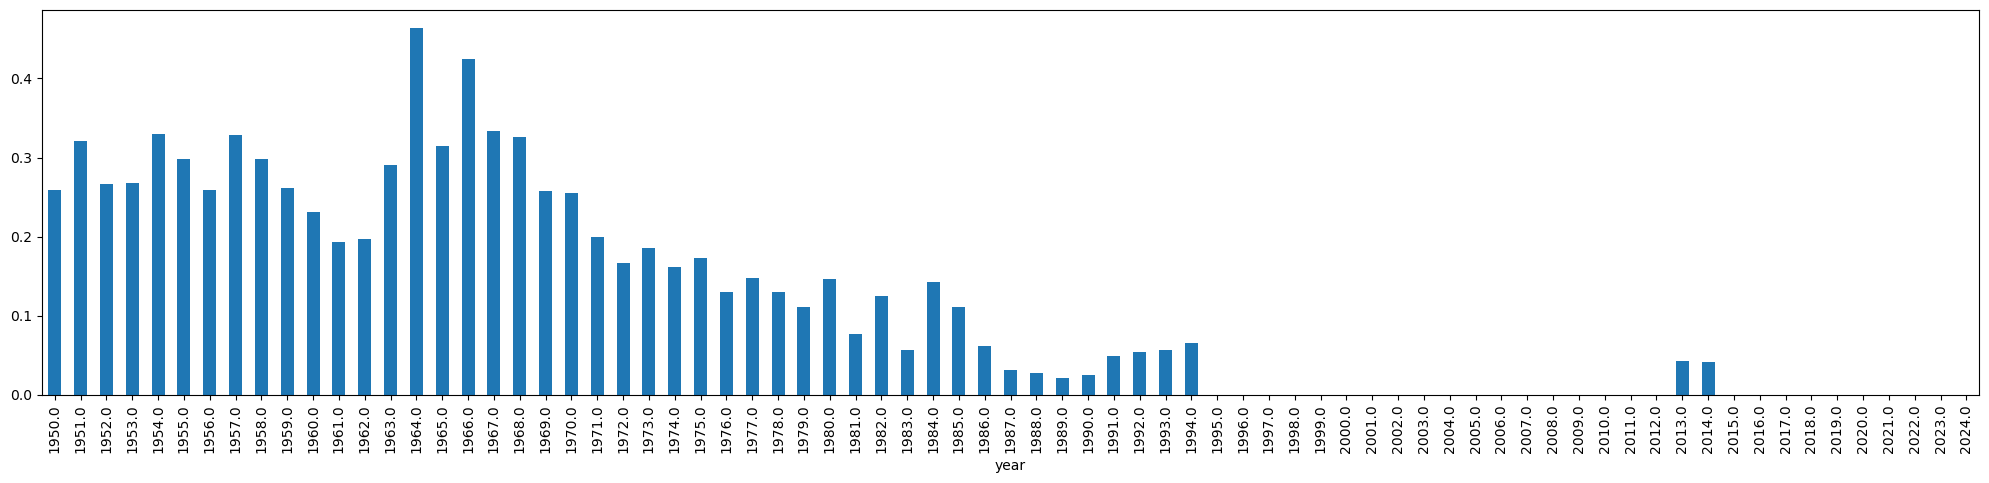

In [61]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['full_name'].nunique() / results.groupby('year')['full_name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

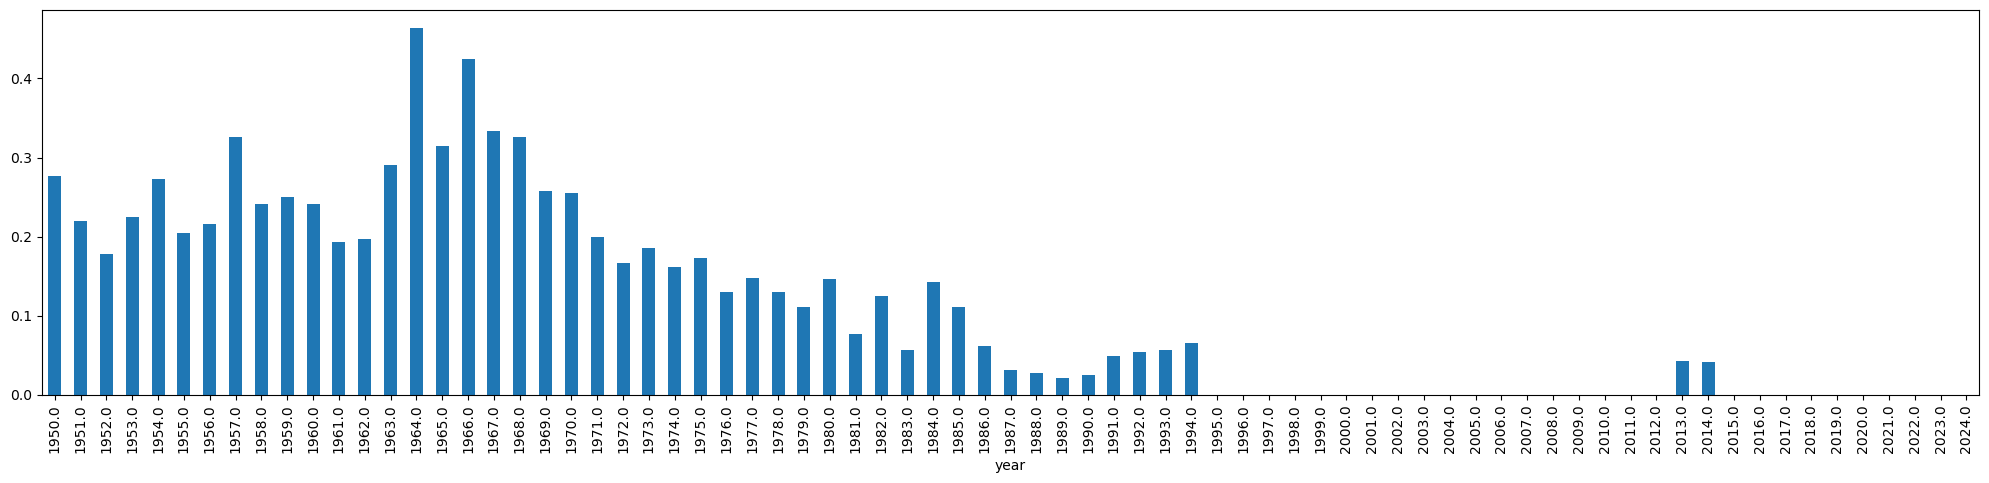

In [62]:
pd.Series(results_wo_indy[(results_wo_indy['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['full_name'].nunique() / results_wo_indy.groupby('year')['full_name'].nunique()).plot.bar(figsize=(25,5))

In [63]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['full_name'].nunique() / results.groupby('year')['full_name'].nunique()).nlargest(1)

year
1964.0    0.463415
Name: full_name, dtype: float64

<Axes: xlabel='year'>

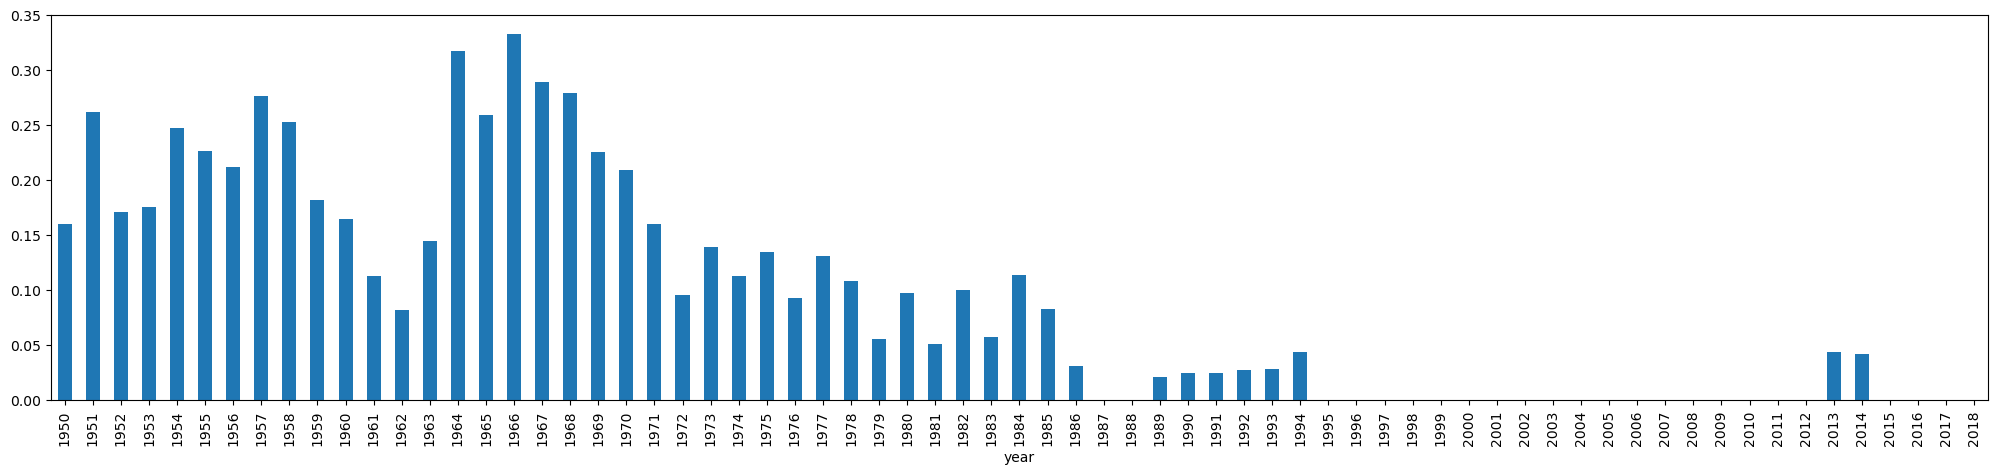

In [64]:
fiveyears = pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby('year')['full_name'].nunique() / results.groupby('year')['full_name'].nunique(), name="Podíl účastníků sezony, které čekalo méně než pět let života")
fiveyears = fiveyears.head(69)
fiveyears.index = fiveyears.index.astype(int)
fiveyears.plot.bar(figsize=(25,5))

In [65]:
fiveyears

year
1950    0.160494
1951    0.261905
1952    0.171429
1953    0.175926
1954    0.247423
          ...   
2014    0.041667
2015         NaN
2016         NaN
2017         NaN
2018         NaN
Name: Podíl účastníků sezony, které čekalo méně než pět let života, Length: 69, dtype: float64

In [66]:
graf(sloupcovy=[fiveyears], procenta=[fiveyears], max_procenta=40, skrytnuly=True, titulek="Kolik jezdců F1 mělo před sebou méně než pět let", podtitulek="Nejhorší vyhlídky dožití měli (bez ohledu na příčinu smrti) účastníci mistrovství světa Formule 1 v půlce 60. let. V 90. letech zahynuli Ayrton Senna a Roland Ratzenberg, v letech 2013 a 2014 je v grafu vidět Jules Bianchi.", target="5let", kredity=["Zdroj dat: Ergast Developer API, Wikipedie | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], barvy=['#fd7f6f'])

Graf uložen.


In [67]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby(['gp','year'])['full_name'].nunique() / results.groupby(['gp','year'])['full_name'].nunique()).nlargest(5)

gp                 year  
Monaco Grand Prix  1966.0    0.562500
                   1968.0    0.555556
French Grand Prix  1957.0    0.533333
                   1967.0    0.533333
Dutch Grand Prix   1966.0    0.529412
Name: full_name, dtype: float64

In [68]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby(['gp','year'])['full_name'].nunique() / results.groupby(['gp','year'])['full_name'].nunique()).nlargest(5)

gp                    year  
French Grand Prix     1957.0    0.533333
Argentine Grand Prix  1957.0    0.500000
                      1958.0    0.500000
Monaco Grand Prix     1967.0    0.473684
Dutch Grand Prix      1967.0    0.470588
Name: full_name, dtype: float64

In [69]:
results[(results['gp'] == 'French Grand Prix') & (results['year'] == 1957)][['full_name','date_of_death','cause_of_death_mistral']].sort_values(by='date_of_death').drop_duplicates()

,full_name,date_of_death,cause_of_death_mistral
10679,Herbert MacKay-Fraser,1957-07-14,otherracing
6356,Luigi Musso,1958-07-06,gp
6320,Peter Collins,1958-08-03,gp
9249,Stuart Lewis-Evans,1958-10-25,gp
18885,Mike Hawthorn,1959-01-22,traffic
10390,Jean Behra,1959-08-01,otherracing
7772,Harry Schell,1960-05-13,otherf1
10760,Ron Flockhart,1962-04-12,aviation
10824,Horace Gould,1968-11-04,natural
9898,Carlos Menditeguy,1973-04-27,natural


In [70]:
frenchgp57contesters = results[(results['gp'] == 'French Grand Prix') & (results['year'] == 1957)]['full_name'].to_list()

In [71]:
results[(results['full_name'].isin(frenchgp57contesters)) & (results['cause_of_death_mistral'] == 'natural')].groupby('full_name')['date'].max()

full_name
Carlos Menditeguy     1960-02-07
Horace Gould          1960-09-04
Jack Brabham          1970-10-25
Juan Manuel Fangio    1958-07-06
Maurice Trintignant   1964-09-06
Mike MacDowel         1957-07-07
Roy Salvadori         1962-12-29
Name: date, dtype: datetime64[ns]

In [72]:
results[(results['gp'] == 'French Grand Prix') & (results['year'] == 1957)][['full_name','date_of_death','cause_of_death_mistral','position']].sort_values(by='position').drop_duplicates()

,full_name,date_of_death,cause_of_death_mistral,position
18796,Juan Manuel Fangio,1995-07-17,natural,1.0
6356,Luigi Musso,1958-07-06,gp,2.0
6320,Peter Collins,1958-08-03,gp,3.0
18885,Mike Hawthorn,1959-01-22,traffic,4.0
7772,Harry Schell,1960-05-13,otherf1,5.0
10390,Jean Behra,1959-08-01,otherracing,6.0
18228,Mike MacDowel,2016-01-18,natural,7.0
18947,Jack Brabham,2014-05-19,natural,7.0
5056,Maurice Trintignant,2005-02-13,natural,NaN
8510,Roy Salvadori,2012-06-03,natural,NaN


In [73]:
podiums = results[results['position'].isin([1,2,3])]
no_of_dead = podiums[podiums['full_name'].isin(dead)].groupby(['gp','year']).size()
no_of_dead = pd.DataFrame(no_of_dead).reset_index().rename(columns = {0: 'no_of_dead'})
podiums = podiums.merge(no_of_dead, on=['year','gp'])
podiums = podiums[podiums['no_of_dead'] == 3]

In [74]:
podiums.groupby(['gp','year'])['date'].max().nlargest(10)

gp                             year  
Portuguese Grand Prix          1985.0   1985-04-21
British Grand Prix             1982.0   1982-07-18
San Marino Grand Prix          1982.0   1982-04-25
Austrian Grand Prix            1978.0   1978-08-13
Japanese Grand Prix            1977.0   1977-10-23
British Grand Prix             1977.0   1977-07-16
Belgian Grand Prix             1977.0   1977-06-05
Brazilian Grand Prix           1977.0   1977-01-23
Spanish Grand Prix             1976.0   1976-05-02
United States Grand Prix West  1976.0   1976-03-28
Name: date, dtype: datetime64[ns]

In [75]:
podiums.groupby(['gp','year'])['life_remaining'].sum().nsmallest(10)

gp                        year  
Austrian Grand Prix       1978.0   2112 days
French Grand Prix         1956.0   2145 days
Indianapolis 500          1954.0   3099 days
United States Grand Prix  1971.0   3290 days
Monaco Grand Prix         1969.0   3674 days
South African Grand Prix  1968.0   3964 days
Swiss Grand Prix          1953.0   7313 days
San Marino Grand Prix     1982.0   8899 days
Swiss Grand Prix          1950.0   8956 days
Swedish Grand Prix        1973.0   9072 days
Name: life_remaining, dtype: timedelta64[ns]

In [76]:
2112 / 365

5.786301369863014

In [77]:
podiums.groupby(['gp','year'])['life_remaining'].max().nsmallest(10).dt.days / 365

gp                        year  
French Grand Prix         1956.0     3.084932
Austrian Grand Prix       1978.0     3.736986
Indianapolis 500          1954.0     6.057534
Monaco Grand Prix         1969.0     6.536986
United States Grand Prix  1971.0     6.945205
South African Grand Prix  1968.0     7.915068
Swiss Grand Prix          1953.0    12.860274
United States Grand Prix  1962.0    13.153425
Swiss Grand Prix          1950.0    16.082192
British Grand Prix        1950.0    16.142466
Name: life_remaining, dtype: float64

In [78]:
podiums.groupby(['gp','year'])['life_remaining'].min()

gp                             year  
Argentine Grand Prix           1953.0    858 days
                               1954.0   4547 days
                               1957.0    930 days
                               1958.0    168 days
                               1974.0   6839 days
                                           ...   
United States Grand Prix       1969.0    259 days
                               1971.0     21 days
                               1973.0   1800 days
                               1974.0    894 days
United States Grand Prix West  1976.0   1587 days
Name: life_remaining, Length: 165, dtype: timedelta64[ns]

In [79]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby(['gp','year'])['full_name'].nunique() / results.groupby(['gp','year'])['full_name'].nunique()).nlargest(5)

gp                    year  
Belgian Grand Prix    1967.0    0.222222
Dutch Grand Prix      1958.0    0.222222
Belgian Grand Prix    1958.0    0.210526
Argentine Grand Prix  1958.0    0.200000
French Grand Prix     1967.0    0.200000
Name: full_name, dtype: float64

<Axes: xlabel='year'>

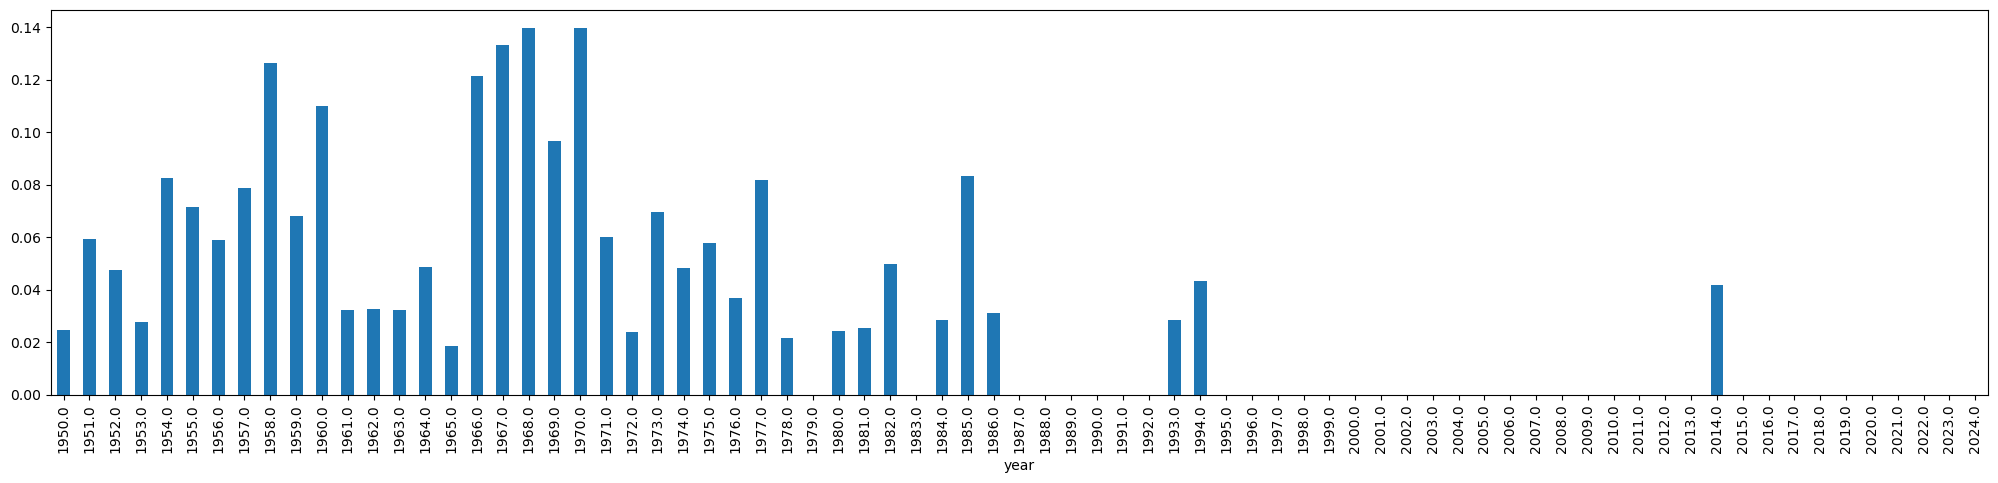

In [80]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['full_name'].nunique() / results.groupby('year')['full_name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

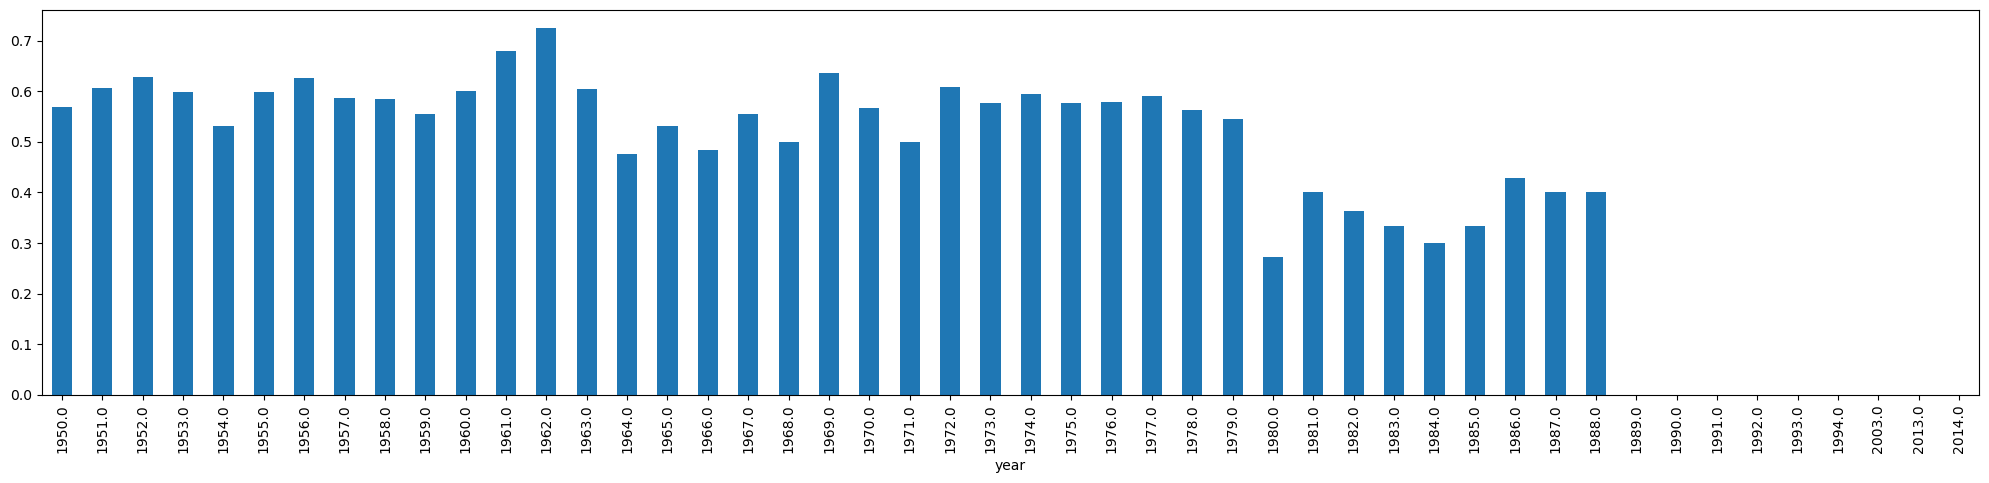

In [81]:
pd.Series(results[results['cause_of_death_mistral'] == 'natural'].groupby('year')['full_name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['full_name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

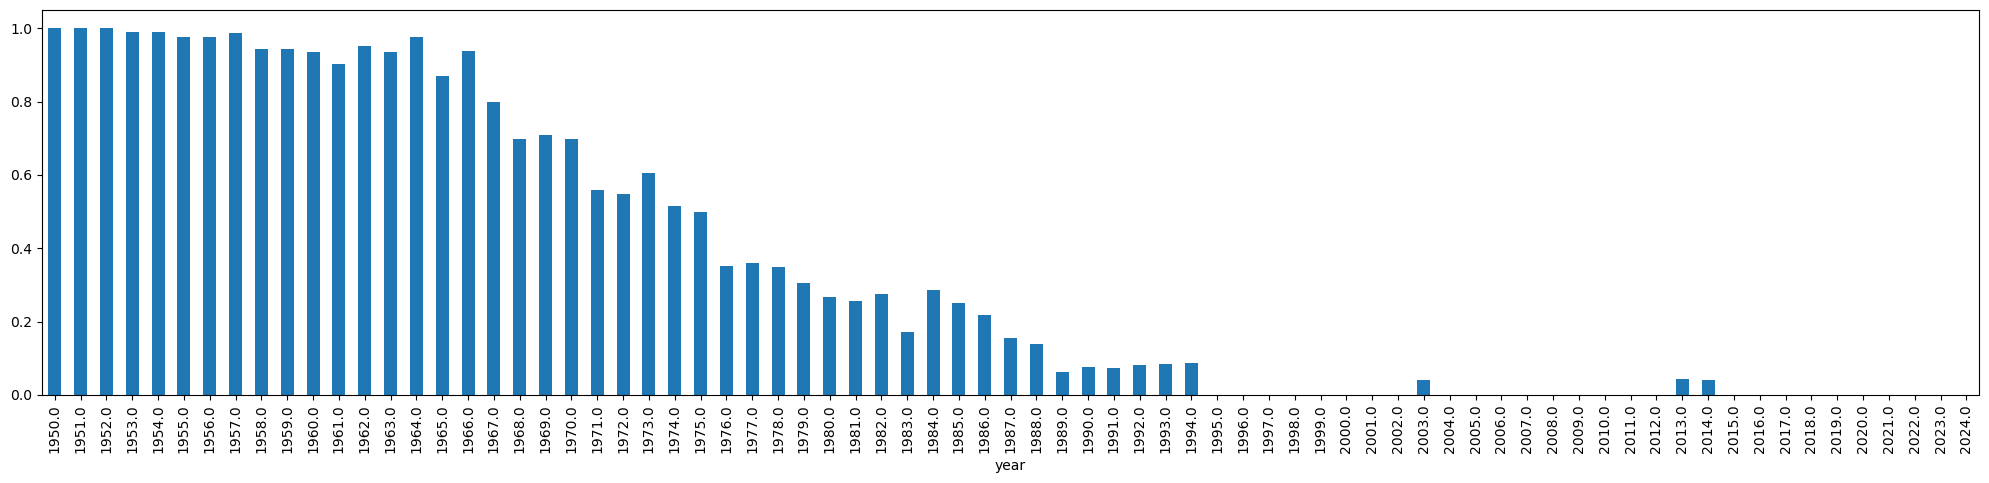

In [82]:
ratio_of_dead_drivers = pd.Series(results[results['full_name'].isin(dead)].groupby('year')['full_name'].nunique() / results.groupby('year')['full_name'].nunique())
ratio_of_dead_drivers.plot.bar(figsize=(25,5))

In [83]:
ratio_of_dead_drivers[ratio_of_dead_drivers <= 0.5]

year
1975.0    0.500000
1976.0    0.351852
1977.0    0.360656
1978.0    0.347826
1979.0    0.305556
1980.0    0.268293
1981.0    0.256410
1982.0    0.275000
1983.0    0.171429
1984.0    0.285714
1985.0    0.250000
1986.0    0.218750
1987.0    0.156250
1988.0    0.138889
1989.0    0.063830
1990.0    0.075000
1991.0    0.073171
1992.0    0.081081
1993.0    0.085714
1994.0    0.086957
2003.0    0.041667
2013.0    0.043478
2014.0    0.041667
Name: full_name, dtype: float64

<Axes: xlabel='year'>

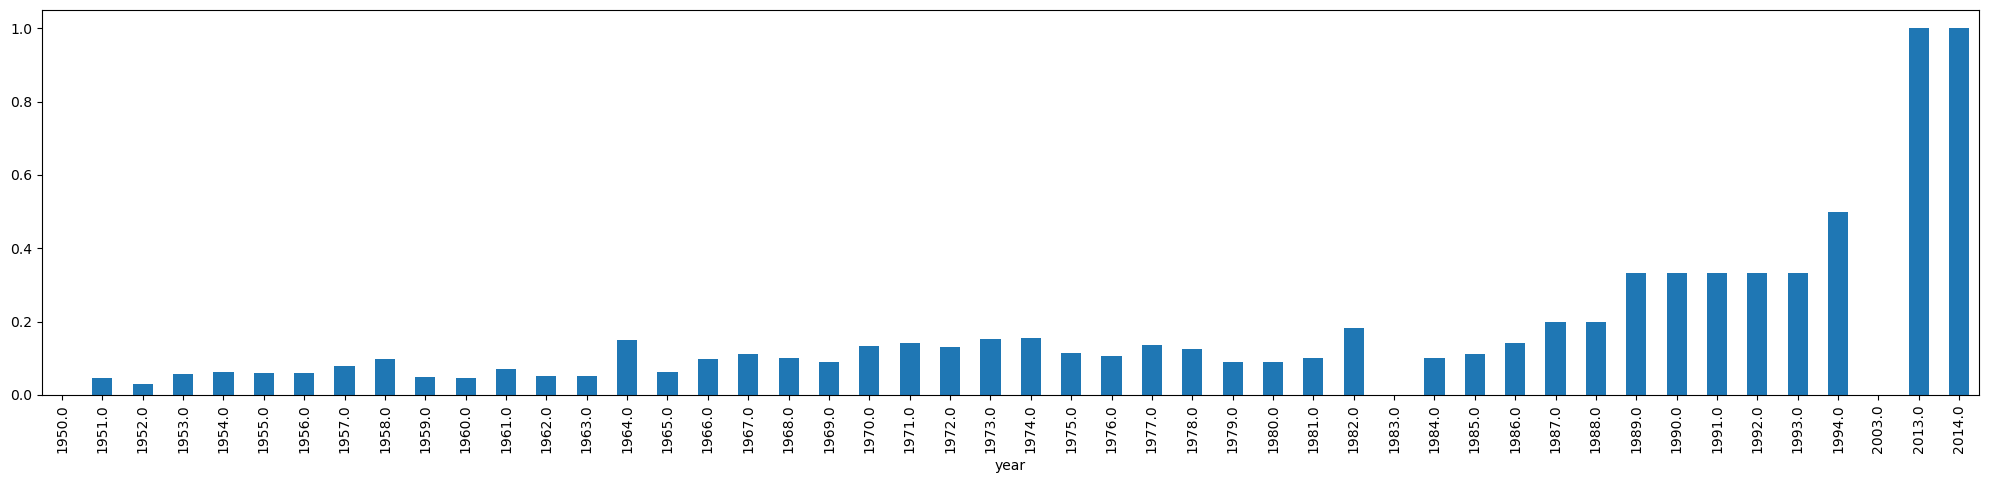

In [84]:
pd.Series(results[results['cause_of_death_mistral'] == 'gp'].groupby('year')['full_name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['full_name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

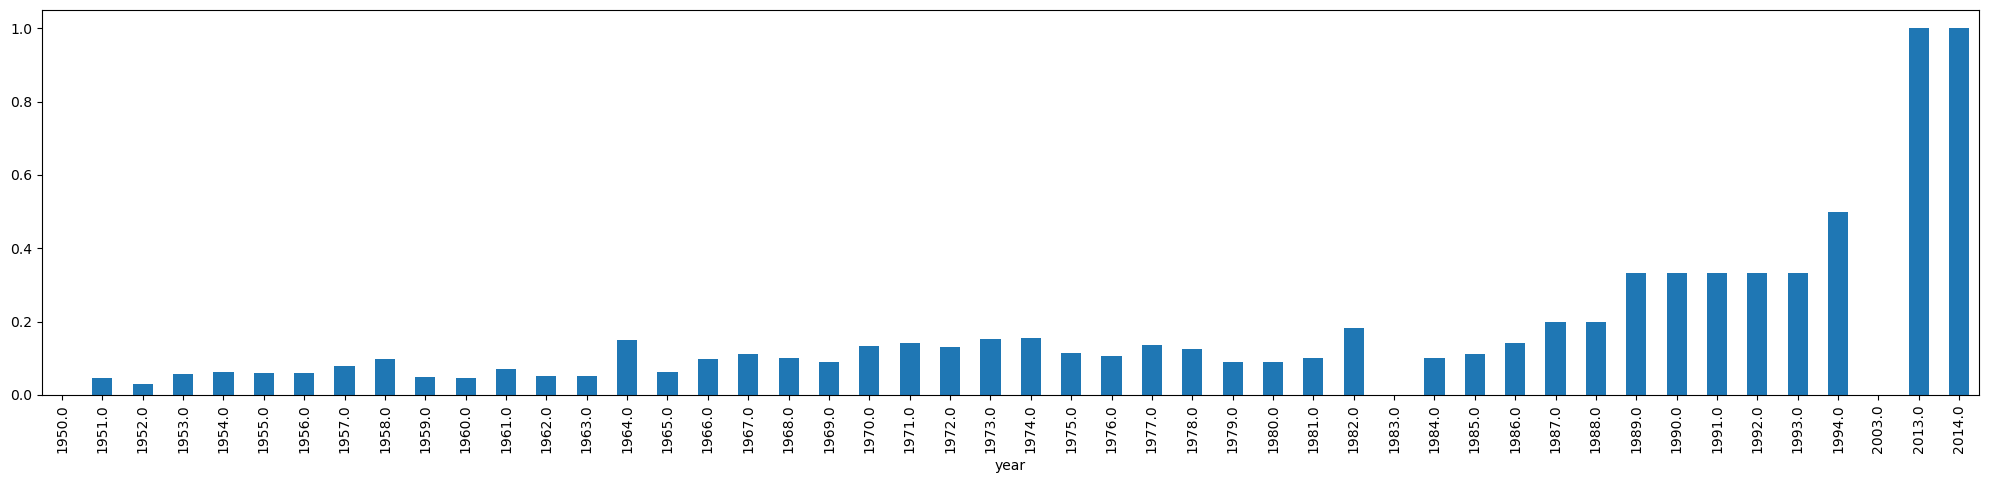

In [85]:
pd.Series(results[results['cause_of_death_mistral'] == 'gp'].groupby('year')['name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

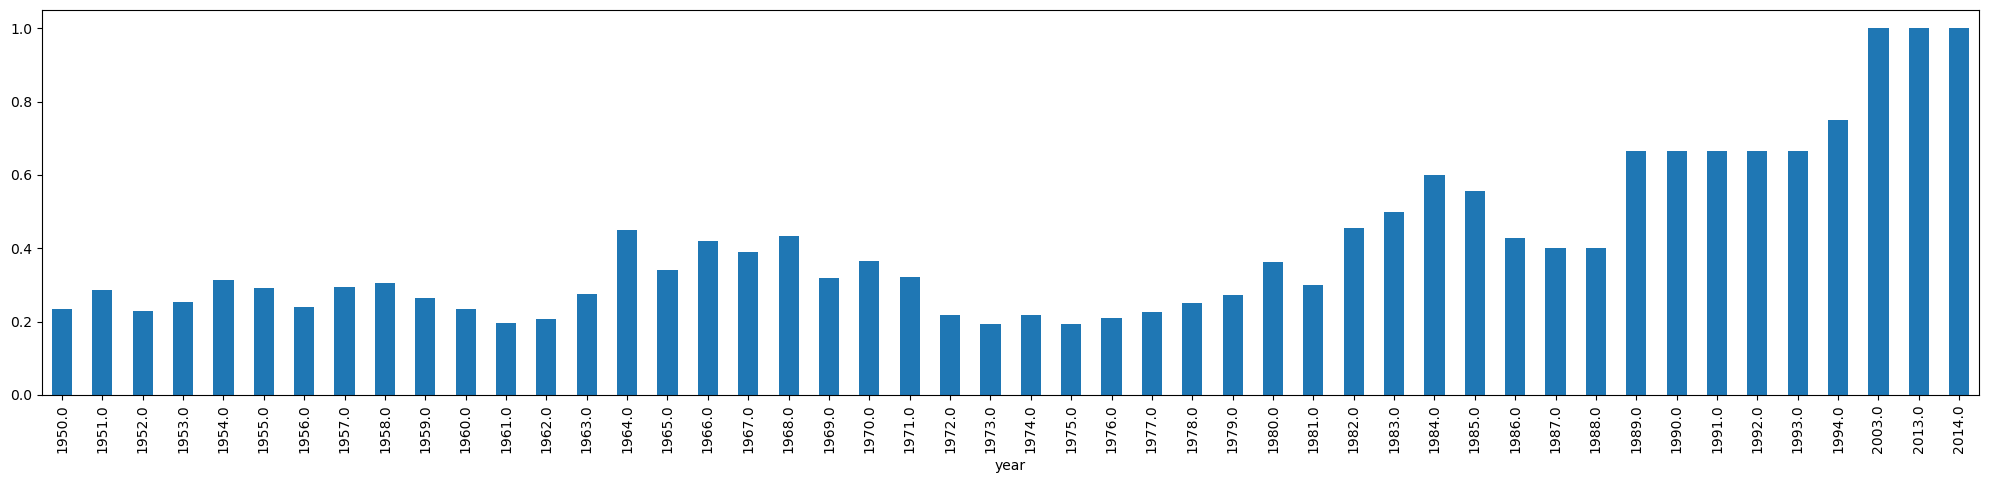

In [86]:
pd.Series(results[results['cause_of_death_mistral'].isin(['gp','otherf1','otherracing'])].groupby('year')['name'].nunique() / results[results['full_name'].isin(dead)].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

## More on life expectancy

In [87]:
results.groupby("year")['lived_until'].median().dt.days / 365.25

year
1950.0    69.034908
1951.0    72.506502
1952.0    70.776181
1953.0    71.600274
1954.0    71.600274
            ...    
2020.0    29.656400
2021.0    28.525667
2022.0    28.221766
2023.0    27.611225
2024.0    26.554415
Name: lived_until, Length: 75, dtype: float64

<Axes: xlabel='year'>

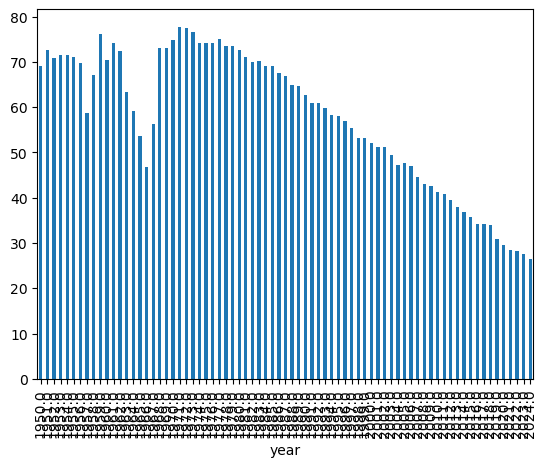

In [88]:
pd.Series(results.groupby("year")['lived_until'].median().dt.days / 365.25).plot.bar()

In [89]:
results[['full_name','date_of_birth','date_of_death','lived_until']].drop_duplicates().sort_values(by='lived_until')

,full_name,date_of_birth,date_of_death,lived_until
1374,Oliver Bearman,2005-05-08,NaT,6930 days
8952,Ricardo Rodríguez de la Vega,1942-02-14,1962-11-01,7565 days
12703,Peter Ryan,1940-06-10,1962-07-02,8057 days
21402,Liam Lawson,2002-02-11,NaT,8112 days
9892,Chris Bristow,1937-12-02,1960-06-19,8235 days
...,...,...,...,...
9909,Leslie Marr,1922-08-14,2021-05-04,36058 days
21498,Paul Pietsch,1911-06-20,2012-05-31,36871 days
10423,Kenneth McAlpine,1920-09-21,2023-04-08,37454 days
17329,Clemar Bucci,NaT,2011-01-12,NaT


## Red-flagged races

In [90]:
rf = pd.read_csv(os.path.join("data_raw/wikipedia_red_flags","List_of_red-flagged_Formula_One_races_2.csv"))

In [91]:
rf

,Race,Lap,R,Winner,Incident that prompted red flag,Failed to make the restart,Ref.
0,1971 Canadian Grand Prix,64,N,Jackie Stewart,Mist.,NaN,NaN
1,1973 British Grand Prix,2,Y,Peter Revson,"Crash involving Jody Scheckter, Jean-Pierre Be...","Jody Scheckter, Jean-Pierre Beltoise, George F...",NaN
2,1974 Brazilian Grand Prix,32,N,Emerson Fittipaldi,Rain.,NaN,NaN
3,1975 Spanish Grand Prix,29,N,Jochen Mass,Crash of Rolf Stommelen which killed five spec...,NaN,NaN
4,1975 British Grand Prix,56,N,Emerson Fittipaldi,"Rain and crashes involving Wilson Fittipaldi, ...",NaN,NaN
...,...,...,...,...,...,...,...
90,2023 Australian Grand Prix,57,R,Max Verstappen,"Crashes involving Logan Sargeant, Nyck de Vrie...","Logan Sargeant, Nyck de Vries, Esteban Ocon an...",NaN
91,2023 Dutch Grand Prix,64,R,Max Verstappen,"Rain and crash of Zhou Guanyu, resulting in a ...",Zhou Guanyu (crash),NaN
92,2023 Mexico City Grand Prix,34,R,Max Verstappen,"Crash of Kevin Magnussen, resulting in a damag...",Kevin Magnussen (crash),NaN
93,2023 São Paulo Grand Prix,2,R,Max Verstappen,Crash involving Alexander Albon and Kevin Magn...,"Alexander Albon, Kevin Magnussen",NaN


In [92]:
rf['Year'] = rf['Race'].apply(lambda x: int(str(x)[0:4]))

In [93]:
rf

,Race,Lap,R,Winner,Incident that prompted red flag,Failed to make the restart,Ref.,Year
0,1971 Canadian Grand Prix,64,N,Jackie Stewart,Mist.,NaN,NaN,1971
1,1973 British Grand Prix,2,Y,Peter Revson,"Crash involving Jody Scheckter, Jean-Pierre Be...","Jody Scheckter, Jean-Pierre Beltoise, George F...",NaN,1973
2,1974 Brazilian Grand Prix,32,N,Emerson Fittipaldi,Rain.,NaN,NaN,1974
3,1975 Spanish Grand Prix,29,N,Jochen Mass,Crash of Rolf Stommelen which killed five spec...,NaN,NaN,1975
4,1975 British Grand Prix,56,N,Emerson Fittipaldi,"Rain and crashes involving Wilson Fittipaldi, ...",NaN,NaN,1975
...,...,...,...,...,...,...,...,...
90,2023 Australian Grand Prix,57,R,Max Verstappen,"Crashes involving Logan Sargeant, Nyck de Vrie...","Logan Sargeant, Nyck de Vries, Esteban Ocon an...",NaN,2023
91,2023 Dutch Grand Prix,64,R,Max Verstappen,"Rain and crash of Zhou Guanyu, resulting in a ...",Zhou Guanyu (crash),NaN,2023
92,2023 Mexico City Grand Prix,34,R,Max Verstappen,"Crash of Kevin Magnussen, resulting in a damag...",Kevin Magnussen (crash),NaN,2023
93,2023 São Paulo Grand Prix,2,R,Max Verstappen,Crash involving Alexander Albon and Kevin Magn...,"Alexander Albon, Kevin Magnussen",NaN,2023


In [94]:
rf.groupby('Year')['Race'].nunique()

Year
1971    1
1973    1
1974    1
1975    3
1976    2
1978    2
1979    2
1980    1
1981    2
1982    2
1984    4
1985    1
1986    1
1987    4
1988    1
1989    4
1990    4
1991    1
1992    1
1994    3
1995    4
1996    1
1997    2
1998    3
1999    1
2000    1
2001    2
2003    1
2007    1
2009    1
2010    1
2011    2
2012    1
2013    1
2014    2
2016    3
2017    1
2020    3
2021    6
2022    3
2023    4
2024    1
Name: Race, dtype: int64

In [95]:
rf[rf['Incident that prompted red flag'].str.lower().str.contains('rain',na=False)].groupby('Year')['Race'].nunique()

Year
1974    1
1975    2
1978    1
1979    1
1981    2
1984    1
1991    1
1992    1
1994    1
2007    1
2009    1
2010    1
2011    1
2012    1
2014    1
2016    1
2021    1
2022    1
2023    1
Name: Race, dtype: int64

In [96]:
rf.groupby('Race').size().nlargest()

Race
2023 Australian Grand Prix    3
1981 Belgian Grand Prix       2
1987 Austrian Grand Prix      2
1990 Belgian Grand Prix       2
2014 Japanese Grand Prix      2
dtype: int64